# Problem Statement:

Say **Decathlon** wants to send advertisements/promotions about the sports products. Decathlon wants to identify its potential customers who are likely to buy the sports products and send specific advertisements to those groups who are interested in sports. Instead of wasting money on mass advertisement, Decathlon wants to target marketing ads to specific groups of people. This is likely to increase the hit ratio of the advertisement/promotion. So find the groups of teenagers based on their interests.

**Steps:**

1. Acquire data

2. Clean data

3. Standardise data

4. Apply K-Means Clustering

# Data Source:

**snsdata.csv**

# Data Dictionary:

The snsdata has **30000 rows**(samples/observations) and **40 columns**(attributes)

These are the attributes in the dataset:

'gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'

# Import Libraries

In [1]:
# Pandas is a package for data manipulation and analysis
import pandas as pd

# Numpy is a package for scientific computing (multi-dimensional arrays, matrices, mathematical functions)
import numpy as np

# Data visualization library
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library for statistical graphics
import seaborn as sns

# Magic function which displays plots directly below the code cell in jupyter notebook
%matplotlib inline

# K-Means Clustering algorithm
from sklearn.cluster import KMeans


# Acquire Data

In [2]:
teens_df = pd.read_csv("snsdata.csv")

In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teens_df.head())

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [4]:
# To display number of rows and columns in the teens_df

teens_df.shape

(30000, 40)

In [5]:
teens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


# Summary Statistics

In [6]:
teens_df.drop(['gradyear'], axis=1).describe()

,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
# Check for missing values
print('Number of missing values across columns-\n', teens_df.isnull().sum())

Number of missing values across columns-
 gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64


In [8]:
# Missing value inputation using 'mean' age

teens_df = teens_df.fillna({'age': teens_df.age.mean()})     

"""Alternative way of handling missing values in 'age' - you can groupby graduation year, 
then calculate mean age for that graduation year and impute the missing value with this age.                                      """


"Alternative way of handling missing values in 'age' - you can groupby graduation year, \nthen calculate mean age for that graduation year and impute the missing value with this age.                                      "

Teenagers' interest columns are extracted and stored in separate dataframe called interest_df. These columns will form the dimensions for the cluster analysis. Notice, the interest columns seem to be some kind of relative weights and since we don't know what is the range of weights, we will scale all the interest columns

In [9]:
# loc - label based indexing
# For clustering based on interests, we have not considered 4 variables 'gradyear', 'gender', 'age', 'friends' 

interest_df = teens_df.loc[:, 'basketball':'drugs']

In [10]:
# No. of rows and columns

interest_df.shape

(30000, 36)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
interest_std = scaler.fit_transform(interest_df)

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [13]:
#The built-in range function in Python is very useful to generate sequences of numbers 

list(range(1, 15))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [14]:
cluster_range = range(1, 15)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(n_clusters = num_clusters)
  clusters.fit(interest_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

"""The total sum of squared distances of every data point from respective centroid is called Inertia(cluster_error).
Let us print the inertia value for all K values. That K at which the inertia stops to drop significantly 
(elbow method) will be the best K."""

clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1.080000e+06
1,2,1.023757e+06
2,3,9.941145e+05
3,4,9.677649e+05
4,5,9.387006e+05
5,6,9.171092e+05
6,7,8.930556e+05
7,8,8.792179e+05
8,9,8.588087e+05
9,10,8.393804e+05


Text(0,0.5,'cluster errors')

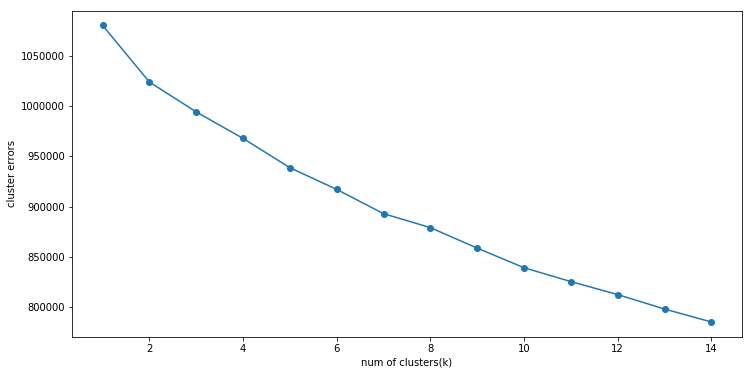

In [15]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel("num of clusters(k)")
plt.ylabel("cluster errors")

In [16]:
kmeans = KMeans(n_clusters=6, random_state=7) #set random_state to some number for reproducibility

In [17]:
kmeans.fit(interest_std)
centroids = kmeans.cluster_centers_

In [18]:
centroids

array([[-1.66649740e-01, -1.63874901e-01, -8.80041343e-02,
        -1.13534228e-01, -1.16054579e-01, -1.04231607e-01,
        -1.12859549e-01, -1.08891242e-01, -5.09834891e-02,
        -1.30639656e-01, -1.88153166e-01, -9.77432031e-02,
        -9.42453356e-02, -1.37734957e-01, -1.35196713e-01,
        -1.59505590e-01, -1.21745577e-01, -1.11031920e-01,
        -1.53133100e-01, -1.24433321e-01, -1.21498941e-01,
        -1.58508549e-01, -8.52748972e-02, -6.81913863e-02,
        -2.04944748e-01, -1.43650733e-01, -2.90510928e-02,
        -1.85690868e-01, -2.27474710e-01, -1.86850609e-01,
        -1.55709226e-01, -1.48669420e-01, -9.47556173e-02,
        -8.35725283e-02, -8.76211189e-02, -1.13797019e-01],
       [ 1.60014940e-01,  2.36421305e-01,  1.03856854e-01,
         7.23214178e-02,  1.88974731e-01,  2.39706338e-01,
         3.93151050e-01,  2.99352845e-02,  1.35326129e-01,
         1.02580075e-01,  3.78849022e-01,  2.00424025e-02,
         1.17407465e-01,  4.13897938e-01,  6.78788144e-

In [19]:
## creating a new dataframe only for labels and converting it into categorical variable

teens_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster_labels']))

teens_labels['cluster_labels'] = teens_labels['cluster_labels'].astype('category')

In [20]:
teens_labels.head(10)

,cluster_labels
0,0
1,5
2,0
3,0
4,3
5,0
6,1
7,0
8,0
9,5


In [21]:
# Joining the 'teens_labels' dataframe with the teens data frame to create teens_df_labeled. 
#Note: it could be appended to original dataframe

teens_df_labeled = teens_df.join(teens_labels)

In [22]:
teens_df_labeled.head(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
0,2006,M,18.98200,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.80100,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
2,2006,M,18.33500,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.87500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.99500,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,3
5,2006,F,17.99395,142,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,2006,F,18.93000,72,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,1
7,2006,M,18.32200,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.05500,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.70800,39,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5


In [23]:
# Dataset for cluster-1

teen_cluster1 = teens_df_labeled.loc[teens_df_labeled.cluster_labels == 0]
print('\nCluster-1 dataset shape:', teen_cluster1.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teen_cluster1.head())


Cluster-1 dataset shape: (21544, 41)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
0,2006,M,18.98200,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006,M,18.33500,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,F,18.87500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2006,F,17.99395,142,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
7,2006,M,18.32200,17,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Dataset for cluster-2

teen_cluster2 = teens_df_labeled.loc[teens_df_labeled.cluster_labels == 1]
print('\nCluster-2 dataset shape:', teen_cluster2.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teen_cluster2.head())


Cluster-2 dataset shape: (871, 41)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
6,2006,F,18.930,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,1
19,2006,F,18.497,123,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,1
20,2006,F,18.738,35,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,1
54,2006,M,18.782,26,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,1
85,2006,M,19.359,15,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


### Clustering helps in identifying outliers, cluster-3 (with cluster_label=2) has one teenager who is an outlier

In [25]:
# Dataset for cluster-3

teen_cluster3 = teens_df_labeled.loc[teens_df_labeled.cluster_labels == 2]
print('\nCluster-3 dataset shape:', teen_cluster3.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teen_cluster3.head())


Cluster-3 dataset shape: (1, 41)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
14187,2007,F,18.119,44,0,2,0,0,0,1,0,0,0,0,1,22,1,0,0,1,1,0,0,1,10,0,1,0,12,2,327,0,0,1,0,0,6,6,6,0,2


In [26]:
# Dataset for cluster-4

teen_cluster4 = teens_df_labeled.loc[teens_df_labeled.cluster_labels == 3]
print('\nCluster-4 dataset shape:', teen_cluster4.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teen_cluster4.head())


Cluster-4 dataset shape: (1030, 41)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,3
27,2006,M,18.426,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,1,0,0,2,0,7,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,3
39,2006,F,19.280,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,3
57,2006,M,18.924,5,0,0,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,1,0,4,0,0,0,8,0,0,2,1,1,0,0,1,0,0,2,3
62,2006,F,18.710,5,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,6,0,0,3,0,2,0,0,0,5,0,0,1,0,1,0,0,0,0,1,0,3


In [27]:
# Dataset for cluster-5

teen_cluster5 = teens_df_labeled.loc[teens_df_labeled.cluster_labels == 4]
print('\nCluster-5 dataset shape:', teen_cluster5.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teen_cluster5.head())


Cluster-5 dataset shape: (600, 41)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
51,2006,M,18.576,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4
56,2006,F,18.374,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4
113,2006,F,19.017,40,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,34,3,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
140,2006,M,19.023,246,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
141,2006,F,19.110,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [28]:
# Dataset for cluster-6

teen_cluster6 = teens_df_labeled.loc[teens_df_labeled.cluster_labels == 5]
print('\nCluster-6 dataset shape:', teen_cluster6.shape)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teen_cluster6.head())



Cluster-6 dataset shape: (5954, 41)


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_labels
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,5
9,2006,F,18.708,39,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,6,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,5
29,2006,F,18.278,7,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,7,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
31,2006,F,18.524,61,3,3,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,5
36,2006,F,19.053,212,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5
